[Reference: theoretical ecology / A simple Metropolis-Hastings MCMC in R](https://theoreticalecology.wordpress.com/2010/09/17/metropolis-hastings-mcmc-in-r/)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 7, 5

In [3]:
import numpy as np
import scipy as sp
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt

# Create Data Set

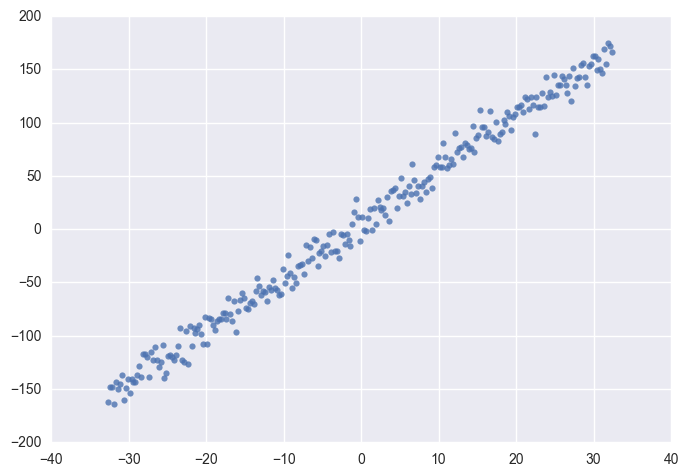

In [4]:
trueA = 5
trueB = 7
trueSD = 10
sample_size = 261
x = np.arange(-sample_size/8, sample_size/8, (sample_size*2/8)/sample_size)
y = trueA *x + trueB + npr.normal(loc=0, scale=trueSD, size=sample_size)

sns.regplot(x=x, y=y, fit_reg=False)

# Define Statistical Model

In [5]:
prior_mu = 0 ; prior_sd = 10000

In [6]:
def likelihood(param):
    a = param[0][0]
    b = param[0][1]
    sd = 10
    
    pred = a*x + b # 要するにこれが「モデル」
    
    sumSqError = np.power((y - pred), 2).sum()
    
    likelihoodsum = ((sample_size/2)*(np.log(1)-np.log(np.power(sd,2)))) + (- 1/(2*np.power(sd,2)) * sumSqError)+\
    (sample_size/2 * np.log(prior_sd)) - ( (1/(2*np.power(prior_sd,2))) * np.power((prior_mu), 2).sum()  ) +\
    (sample_size/2 * np.log(prior_sd)) - ( (1/(2*np.power(prior_sd,2))) * np.power((prior_mu), 2).sum()  ) #b's prior
    
    return likelihoodsum

# Define Next

次に移動した点での $P^*(X)$　に相当するものを考える。<br>
京大の資料に従って、一つずつパラメータを動かす

In [7]:
def next_param(param, param_index):
    a_next = param[0][0] ; b_next = param[0][1]
    
    if param_index == 0:
        a_next = param[0][0] + npr.normal(0, 0.1)
    elif param_index == 1:
        b_next = param[0][1] + npr.normal(0, 0.1)
        
    return np.array([[a_next, b_next]])

In [8]:
def next_param2(param):
    a_next = param[0][0] ; b_next = param[0][1]


    a_next = param[0][0] + npr.normal(0, 0.1)
    b_next = param[0][1] + npr.normal(0, 0.1)

    return np.array([[a_next, b_next]])

# MCMC

In [9]:
num_sampling = 950
chain = np.zeros((num_sampling, 1, 2))
chain[0][0][0] = 20 # starting value for a
chain[0][0][1] = 15 # starting value for b

num_accepted = 0
for i in range(num_sampling-1):
    chain_previous = chain[i][:]
    
    proposal = next_param2(chain[i])

    probab = likelihood(proposal) - likelihood(chain_previous)
    u = np.log(npr.uniform(0, 1))
    if u  < probab:
        chain[i+1] = proposal
        num_accepted += 1
    else:
        chain[i+1] = chain[i]

In [10]:
num_accepted

382

In [11]:
num_sampling = 25000
chain = np.zeros((num_sampling, 1, 2))
chain[0][0][0] = 20 # starting value for a
chain[0][0][1] = 15 # starting value for b

num_accepted = 0
for i in range(num_sampling-1):
    chain_previous = chain[i][:]
    chain_new = np.zeros((1, 1, 2))
    
    for p in range(2):
        proposal = next_param(chain_previous, p)
        
        probab = likelihood(proposal) - likelihood(chain_previous)
        u = np.log(npr.uniform(0, 1))
        if u < probab :
            chain_new[0][0][p] = proposal[0][p]
            num_accepted += 1
        else:
            chain_new[0][0][p] = chain[i][0][p]
            
    chain[i+1] = chain_new[0][:]

BDA通りに書くと、
```
check = min(np.exp(probab), 1) #BDA p.278
npr.uniform(0,1) < check
```
となるけれど、`np.exp(probab)`が1より大きければ結局1との大小を比べることになって常にacceptされるはずだから上のコードになるのでは

In [12]:
num_accepted

33102

# Show Results

## a

In [13]:
show_num = int(num_sampling * 0.99)

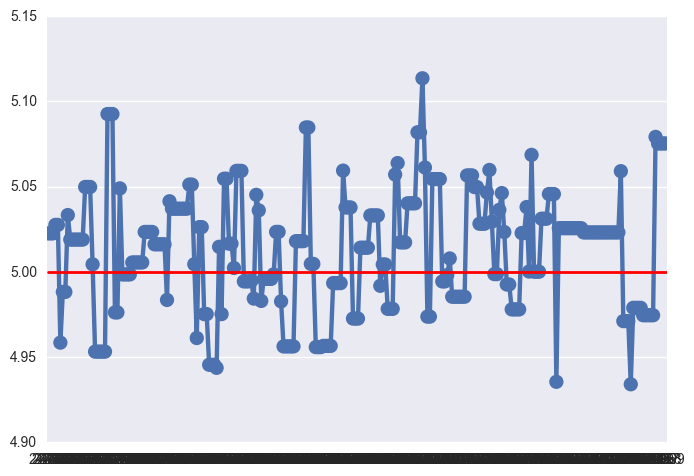

In [14]:
sns.pointplot(x=np.arange(show_num, num_sampling, 1), y=chain[show_num: , 0, 0])
plt.plot([0, num_sampling-show_num], [5, 5], linewidth=2, color='red')

In [15]:
chain[show_num: , 0, 0].mean()

5.0128765022632047

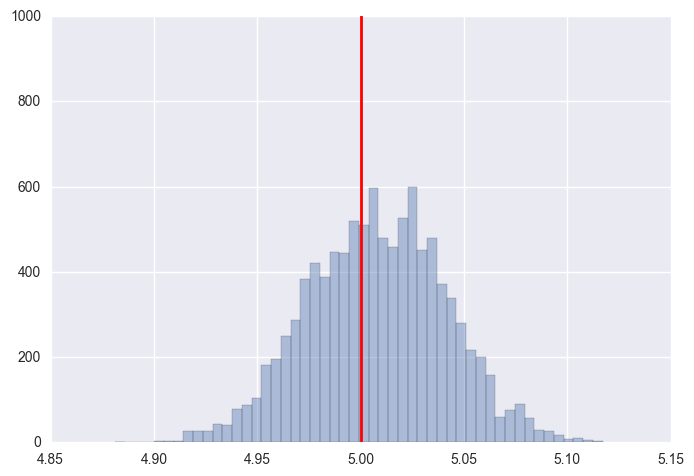

In [16]:
sns.distplot(chain[int(num_sampling * 0.60): , 0, 0], hist=True, kde=False)
plt.plot([5, 5], [0, 1000], linewidth=2, color='red')

## b

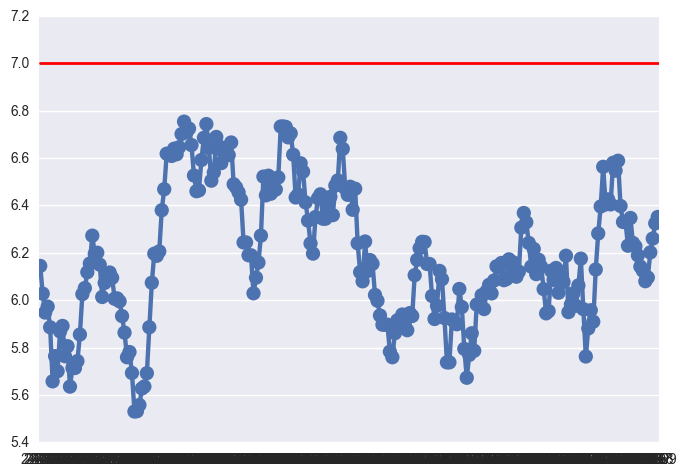

In [17]:
sns.pointplot(x=np.arange(show_num, num_sampling, 1), y=chain[show_num: , 0, 1])
plt.plot([0, num_sampling-show_num], [7, 7], linewidth=2, color='red')

In [18]:
chain[show_num: , 0, 1].mean()

6.1856030778005096

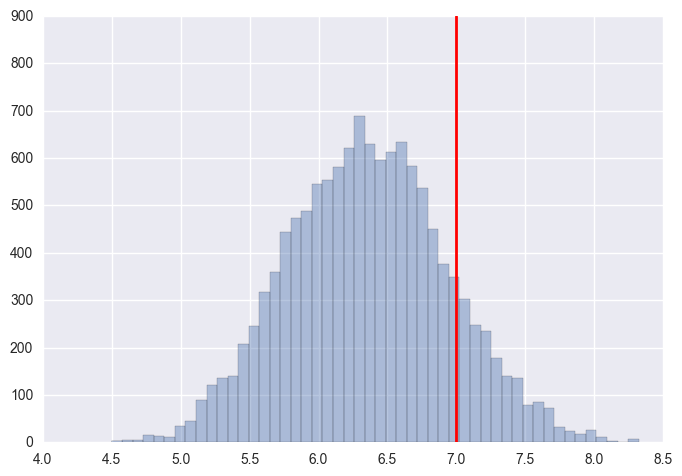

In [19]:
sns.distplot(chain[int(num_sampling * 0.50): , 0, 1], hist=True, kde=False)
plt.plot([7, 7], [0, 900], linewidth=2, color='red')